In [1]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from google.colab import autoviz
warnings.filterwarnings('ignore')                   # Ignoring python warnings

In [2]:
df = pd.read_csv('HR_comma_sep.csv.txt')

# Data Prepocessing

In [3]:
# Analyzing few random rows of the data
df.sample(4)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
2131,0.82,0.93,4,185,2,0,0,0,RandD,medium
12342,0.90,1.00,5,232,5,0,1,0,technical,medium
13603,0.98,0.68,5,171,3,0,0,0,management,high
3919,0.64,0.95,4,199,4,0,0,0,accounting,medium


In [4]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [5]:
df.isnull().any().sum()

0

In [6]:
df.shape

(14999, 10)

In [7]:
# Renaming few columns for uniformity
df = df.rename(columns={
                        'number_project': 'projects',
                        'average_montly_hours': 'average_monthly_hours',
                        'Work_accident': 'work_accident',
                        'sales' : 'department',
                        'left' : 'employee_turnover'
                        })

df.tail(1)

,satisfaction_level,last_evaluation,projects,average_monthly_hours,time_spend_company,work_accident,employee_turnover,promotion_last_5years,department,salary
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [8]:
# Analyzing the data types of the variables
df.dtypes

satisfaction_level       float64
last_evaluation          float64
projects                   int64
average_monthly_hours      int64
time_spend_company         int64
work_accident              int64
employee_turnover          int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

# EDA - Exploratory Data Analysis

### Calculating Employee Turnover Rate

In [9]:
df.describe()

,satisfaction_level,last_evaluation,projects,average_monthly_hours,time_spend_company,work_accident,employee_turnover,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [10]:
df[df['employee_turnover'] == 1].shape[0]/df.shape[0] * 100

23.80825388359224

##### Employee Turnover Rate = 23.8%

In [11]:
df.groupby('employee_turnover').mean()

,satisfaction_level,last_evaluation,projects,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years
employee_turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


##### Creating a correlation matrix to see which features are contributing the most towards employees turnover.

In [12]:
corr = df.corr()
corr

,satisfaction_level,last_evaluation,projects,average_monthly_hours,time_spend_company,work_accident,employee_turnover,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
projects,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_monthly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
employee_turnover,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


# Data Visualization

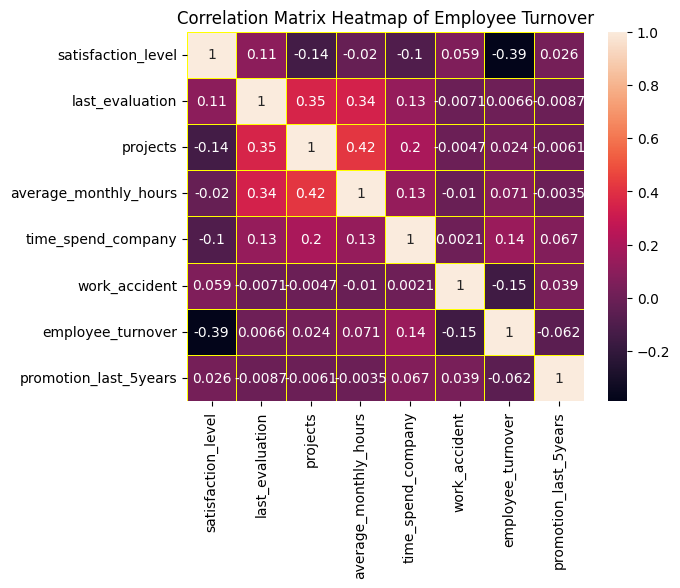

In [13]:
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, linecolor="yellow", linewidths = 0.5)
plt.title('Correlation Matrix Heatmap of Employee Turnover');

##### As we can see from the heatmap the following features are contributing mostly towards employee turnover

1. Time Spend Company (in years)
2. Average Monthly Hours
3. Projects
4. Last Evaluation

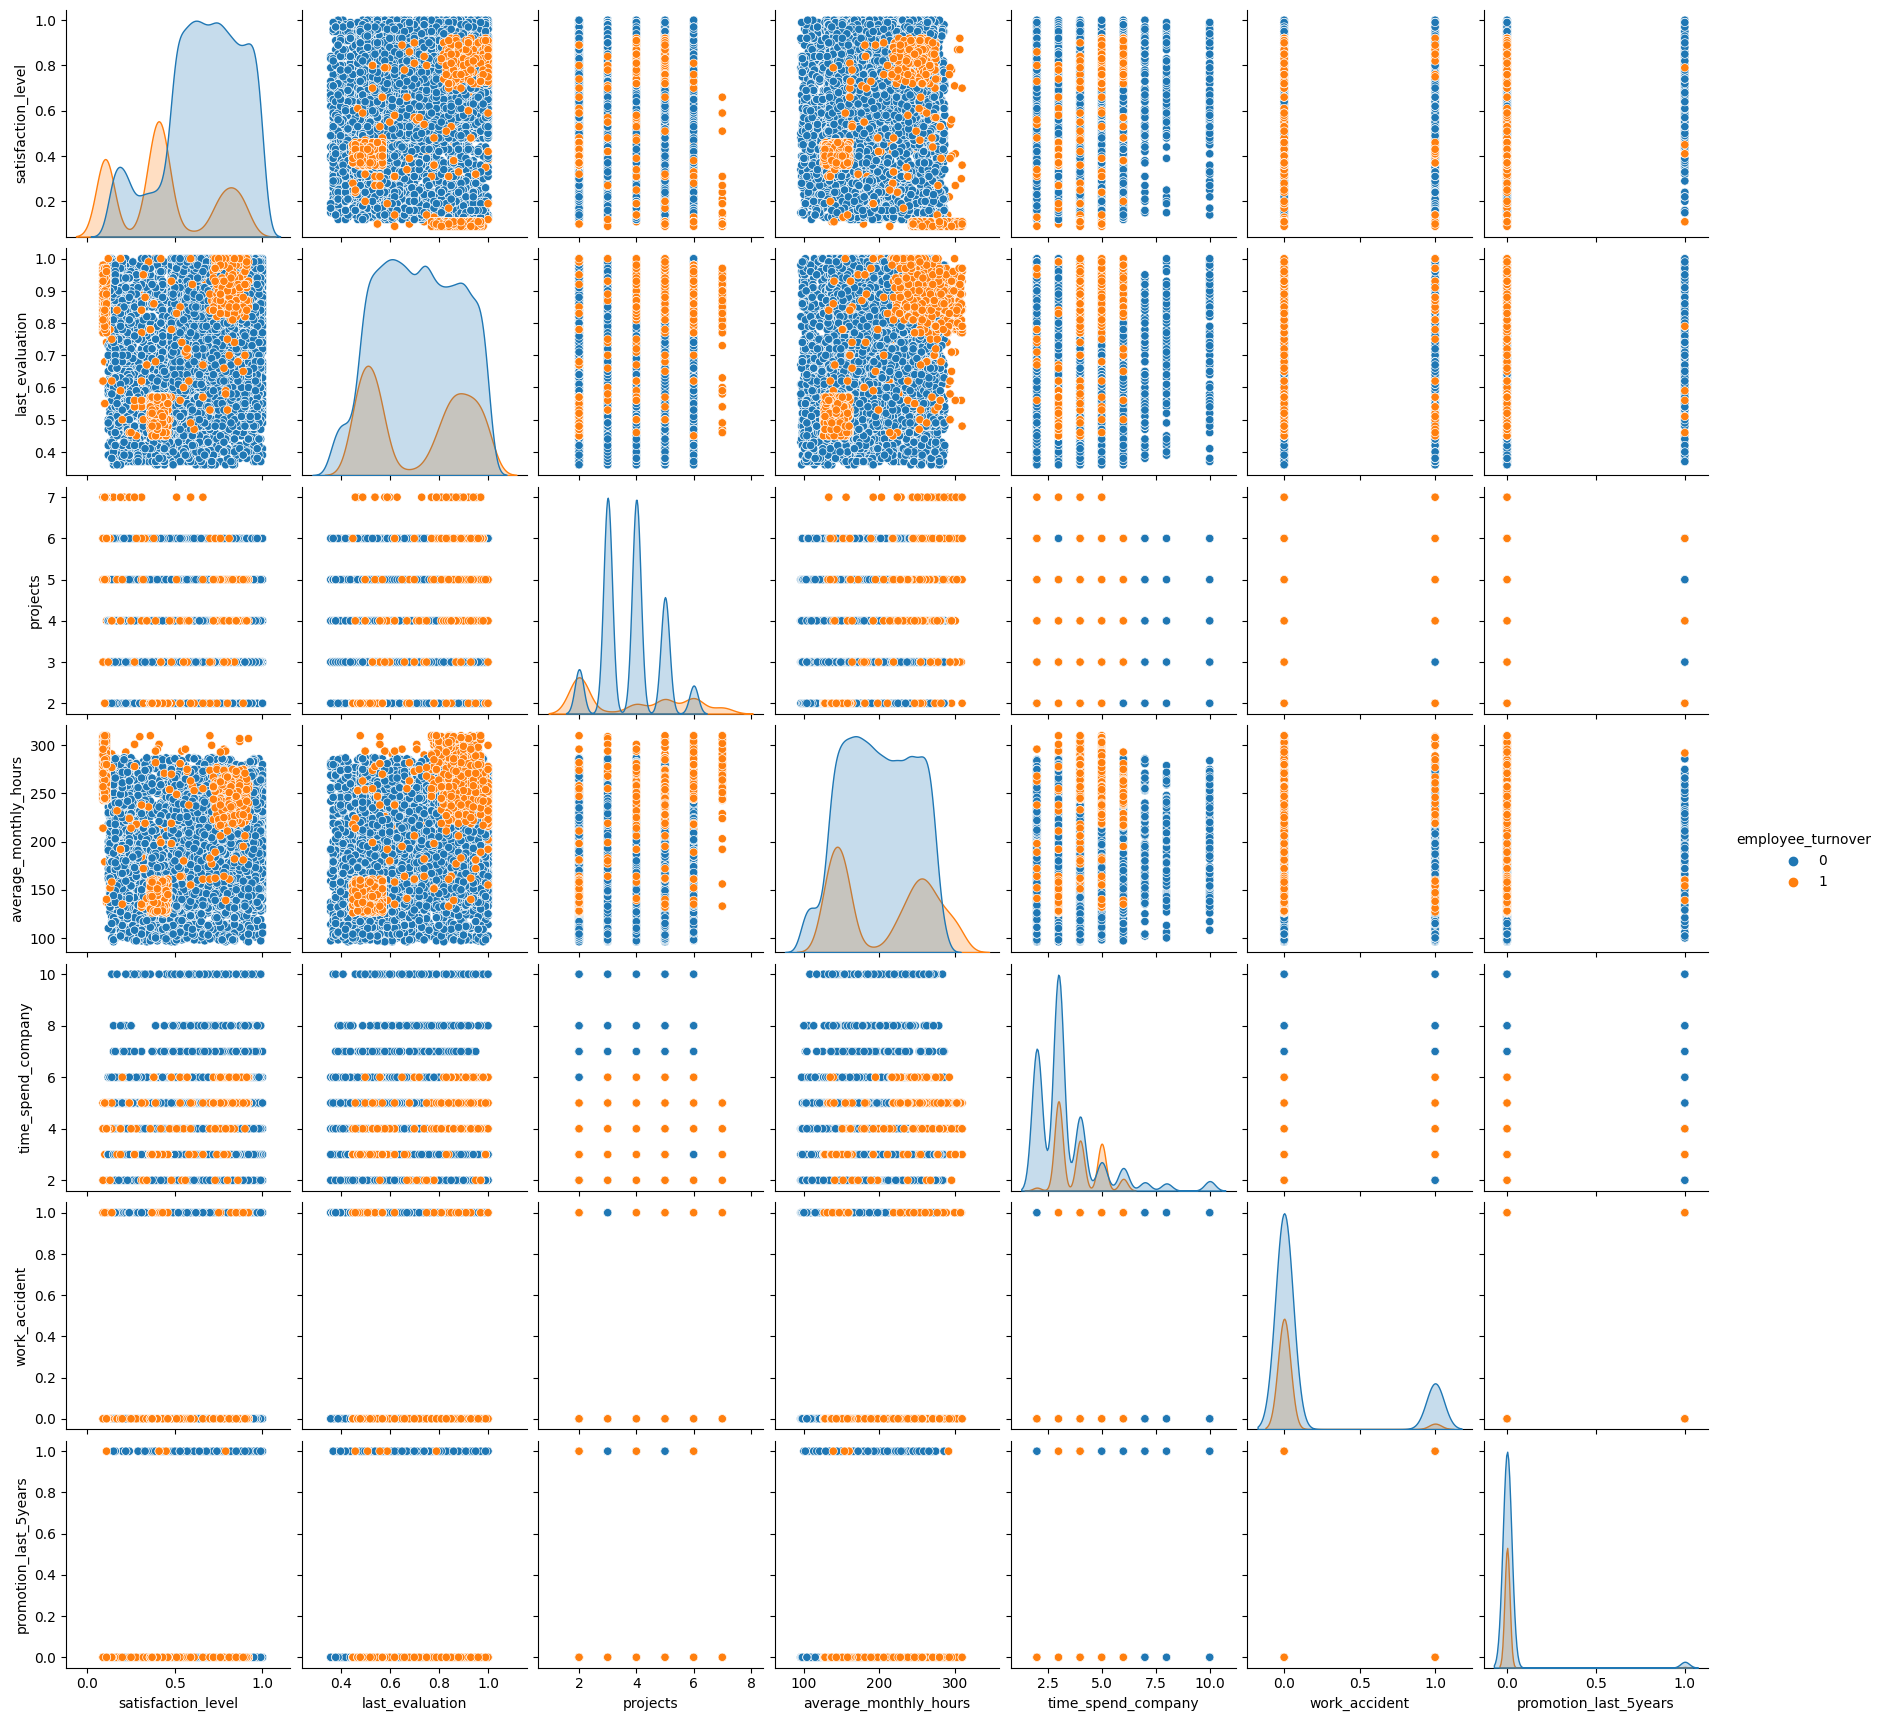

In [14]:
sns.pairplot(data=df, hue='employee_turnover');

### Notable Observation:
1. We can clearly observe that employees with higher **satisfaction level** have very few chances to turnover
2. Moreover, employee with more **number of projects** have a higher turnover rate. This may be due to stressful work conditions and extreme workload
3. Furthermore, employees with higher **average monthly hours** have a much higher turnover rate as compared to employees with lower average monthly hours
4. Also, we can observe that employees which have spend **more number of years** are less likely to turnover as compared to newer employees
5. Lastly, employees which have not received **promotion in the last 5 years** are more likely to turnover as compared to promoted employees

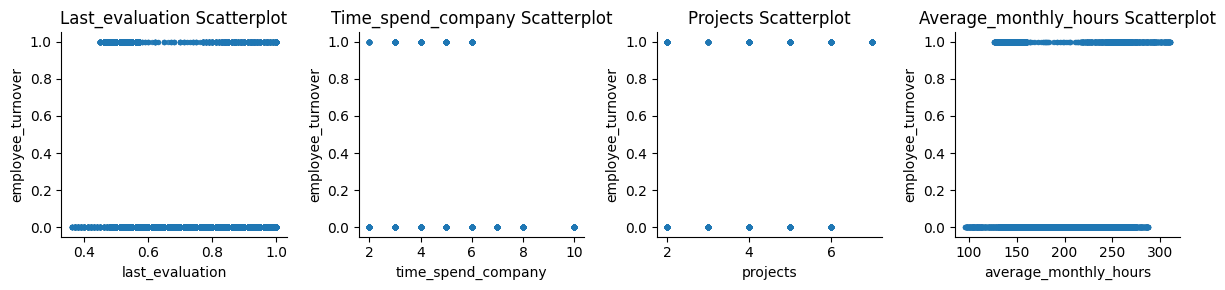

In [15]:
scatter_plot_size=3
size=8
alpha=.6
colname_pairs = [['last_evaluation', 'employee_turnover'], ['time_spend_company', 'employee_turnover'], ['projects', 'employee_turnover'], ['average_monthly_hours', 'employee_turnover']]
plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
    plt.title(x_colname.capitalize()+ " Scatterplot")
plt.tight_layout()

# Data Cleaning

In [16]:
categorical_df = pd.get_dummies(df[['department','salary','employee_turnover','promotion_last_5years']], drop_first=True)
numerical_df = df[['satisfaction_level','last_evaluation','projects','average_monthly_hours','time_spend_company', 'work_accident']]
df_clean = pd.concat([categorical_df,numerical_df], axis=1)
print(df_clean.shape)
df_clean.head()

(14999, 19)


,employee_turnover,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,satisfaction_level,last_evaluation,projects,average_monthly_hours,time_spend_company,work_accident
0,1,0,0,0,0,0,0,0,1,0,0,1,0,0.38,0.53,2,157,3,0
1,1,0,0,0,0,0,0,0,1,0,0,0,1,0.80,0.86,5,262,6,0
2,1,0,0,0,0,0,0,0,1,0,0,0,1,0.11,0.88,7,272,4,0
3,1,0,0,0,0,0,0,0,1,0,0,1,0,0.72,0.87,5,223,5,0
4,1,0,0,0,0,0,0,0,1,0,0,1,0,0.37,0.52,2,159,3,0


### Split Train Test (20% Testing 80% Training)

In [17]:
X = df_clean.iloc[:,1:]
Y = df_clean.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.20, random_state=5, stratify=Y)

## Random Forest Classifier

In [18]:
rf = RandomForestClassifier(class_weight="balanced")

rf = rf.fit(X_train, y_train)
print("Random Forest Classifier Accuracy = "+ str(accuracy_score(y_test, rf.predict(X_test))*100 ) +"%")

Random Forest Classifier Accuracy = 99.0%


### Using 10-Fold Cross Validation in Random Forest Classifier

In [19]:
# Setting KFolds to 10
kfold = model_selection.KFold(n_splits=10)

# Defining the evaluation metric
scoring = 'roc_auc'

rf_results = model_selection.cross_val_score(rf, X_train, y_train, cv=kfold, scoring=scoring)   # Applying 10 Fold Cross Validation
rf_results

array([0.98687824, 0.99147614, 0.9896427 , 0.99101144, 0.99665441,
       0.99513448, 0.98574383, 0.9948801 , 0.99182283, 0.99646358])

### Random Forest AUC (Area under the ROC Curve)

In [20]:
rf_auc = rf_results.mean()
print("Random Forest Average Score : %.2f and the Standard Deviation : (%.3f)" % (rf_auc*100 , rf_results.std()))

Random Forest Average Score : 99.20 and the Standard Deviation : (0.004)


In [21]:
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC (Area under the ROC Curve) = %.1f" % (rf_roc_auc*100) + "%" + "\n")
print(classification_report(y_test, rf.predict(X_test)))

Random Forest AUC (Area under the ROC Curve) = 98.2%

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       0.99      0.97      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000



## Logistic Regression Model

In [22]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Logistic Regression Accuracy = "+ str(accuracy_score(y_test, lr.predict(X_test))*100 ) +"%")

Logistic Regression Accuracy = 80.7%


### Logistic Regression AUC (Area under the ROC Curve)

In [23]:
lr_results = model_selection.cross_val_score(lr, X_train, y_train, cv=kfold, scoring=scoring)  # Applying 10 Fold Cross Validation
lr_auc = lr_results.mean()
print('Logistic Regression Average Score %.1f'% (lr_auc*100) +"%")

lr_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
print ("Logistic Regression AUC (Area under the ROC Curve) = %.1f" % (lr_roc_auc*100) + "%" + "\n")
print(classification_report(y_test, lr.predict(X_test)))

Logistic Regression Average Score 81.3%
Logistic Regression AUC (Area under the ROC Curve) = 67.1%

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      2286
           1       0.65      0.41      0.50       714

    accuracy                           0.81      3000
   macro avg       0.74      0.67      0.69      3000
weighted avg       0.79      0.81      0.79      3000



### Support Vector Classifier

In [24]:
svclassifier = SVC(kernel='rbf', probability=True)
svc = svclassifier.fit(X_train,y_train)

svc_result = model_selection.cross_val_score(svc, X_train, y_train, cv=kfold, scoring=scoring)    # Applying 10 Fold Cross Validation
svc_result

svc_auc = svc_result.mean()
print("Support Vector Classifier Average Score: %.3f " % (svc_auc*100))

Support Vector Classifier Average Score: 80.918 


### Support Vector Classifier AUC (Area under the ROC Curve)

In [26]:
svc_roc_auc = roc_auc_score(y_test, svc.predict(X_test))
print ("Support Vector Classifier AUC (Area under the ROC Curve): %.2f" % (svc_roc_auc*100))
print(classification_report(y_test, svc.predict(X_test)))

Support Vector Classifier AUC (Area under the ROC Curve): 54.62
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      2286
           1       1.00      0.09      0.17       714

    accuracy                           0.78      3000
   macro avg       0.89      0.55      0.52      3000
weighted avg       0.83      0.78      0.71      3000



### Models ROC Graph Comparison

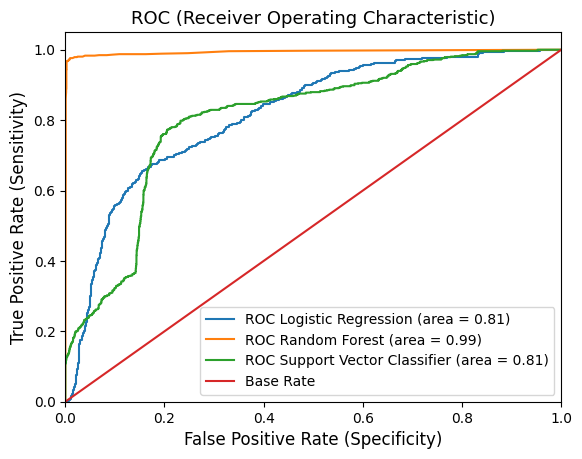

In [27]:
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
svc_fpr, svc_tpr, svc_thresholds = roc_curve(y_test, svc.predict_proba(X_test)[:,1])


plt.figure()

plt.plot(lr_fpr, lr_tpr, label='ROC Logistic Regression (area = %0.2f)' % lr_auc)

plt.plot(rf_fpr, rf_tpr, label='ROC Random Forest (area = %0.2f)' % rf_auc)

plt.plot(svc_fpr, svc_tpr, label='ROC Support Vector Classifier (area = %0.2f)' % svc_auc)

plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12)
plt.title('ROC (Receiver Operating Characteristic)', fontsize=13)
plt.legend(loc="best")
plt.show()

## Feature Importance using Random Forest Classifier

In [28]:
# Analyzing the most important features in our dataset
feature_importances = pd.DataFrame(rf.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()
feature_importances

,index,importance
0,satisfaction_level,0.266460
1,time_spend_company,0.220456
2,projects,0.171041
3,average_monthly_hours,0.164918
4,last_evaluation,0.128311
5,work_accident,0.010598
6,salary_low,0.009068
7,department_technical,0.004774
8,salary_medium,0.004455
9,department_sales,0.004027


## Top 10 Most Important Features Visualization

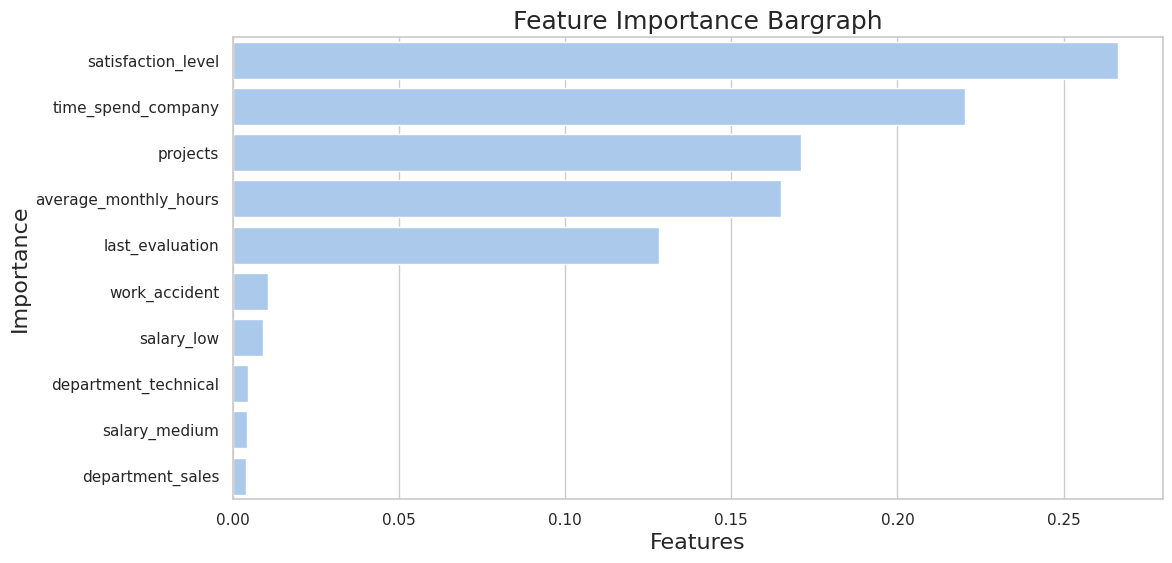

In [29]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(12, 6))
sns.set_color_codes("pastel")
sns.barplot(x="importance", y='index', data=feature_importances[:10], color="b");
plt.xlabel('Features', fontsize=16)
plt.ylabel('Importance', fontsize=16)
plt.title('Feature Importance Bargraph', fontsize=18);

##### The following features are the most important according to Random Forest Importance:
1. **Satisfaction Level**
2. **Time Spend in Company**
3. **Number of Projects**
4. **Average Monthly Hours**
5. **Last Evaluation**

# Employee Retention Plan:

#### Since this model is used for humans, hence we should not solely rely on the models results. A better approach would be to use it's predicted probability to design a customized risk zone for all employees and treat each employee respectively.



1.   **Safe Zone (Green)** – Employees within this zone are considered safe. **[Score < 0.2]**
2.   **Low Risk Zone (Yellow)** – Employees within this zone are too be taken into consideration of potential turnover. This is more of a long-term track.
3. **Medium Risk Zone (Orange)** – Employees within this zone are at risk of turnover. Action should be taken and monitored accordingly.
4. **High Risk Zone (Red)** – Employees within this zone are considered to have the highest chance of turnover. Action should be taken immediately. **[Score > 0.9]**


### Predicting Employee Turnover

In [31]:
rf.predict_proba(X_test)[0:10]

array([[0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.98, 0.02],
       [0.92, 0.08],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.09, 0.91]])